In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [472]:
#pip install xgboost

In [473]:
#from numpy import loadtxt
#from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

In [474]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [475]:
LeadScore_df = pd.read_csv("Lead-analysis/LendingTreeSample_LTFields2022.csv", encoding='latin-1')
LeadScore_df

,2_Digit_NAICS_Code,Account_Name,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_GAS_Grouped,LS_State,LS_GAS,Sales_Rep_ID,Premium_Marketing_Leads,Is_Submitted,Web_Ad_Outlet_Source__c,LS_Entity_Type,SubYearMonth,Email_Domain,LS_Amount_to_Borrow
0,NaN,Deep South Kustoms LLC,Confirmed,1,4,12,$100k-$200k,1,100000,0056g000005SO9OAAW,1,1,Lending Tree,Limited Liability Company,2/1/2022,@GMAIL.COM,10000
1,NaN,"CO HAIR STUDIO, INC",Confirmed,0,3,16,$100k-$200k,4,100000,0054u000007TasyAAC,1,1,Lending Tree,Corporation,12/1/2021,@CPBEAUTYSALON.COM,10000
2,NaN,Galaxy LLC,Confirmed,1,4,34,$200k-$500k,22,200000,0054u000007TasyAAC,1,0,Lending Tree,Limited Liability Company,NaN,@YMAIL.COM,50000
3,NaN,GRICE ADULT FAMILY HOMES,Confirmed,0,4,124,$200k-$500k,44,392000,0054u000007UM56AAG,0,0,Lending Tree,Limited Liability Company,NaN,@HOTMAIL.COM,250000
4,72.0,Darlenes breakfast cafe,Confirmed,0,4,12,$200k-$500k,40,480000,0054u000007UM4rAAG,0,0,Lending Tree,Limited Liability Company,NaN,@GMAIL.COM,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,42.0,WM AUTOMOTIVE LLC,Confirmed,1,4,158,$200k-$500k,9,200000,0054u000007UNCmAAO,0,1,Lending Tree,Limited Liability Company,3/1/2022,@GMAIL.COM,15000
2404,42.0,T & K Distributing,Confirmed,0,4,171,$200k-$500k,9,405000,0054u000007UMALAA4,0,0,Lending Tree,S-Corporation,NaN,@ICLOUD.COM,20000
2405,42.0,Spiffy Sprouts LLC dba Monogram Junkie,Confirmed,1,4,178,$200k-$500k,17,400000,0054u000007TbRPAA0,0,0,Lending Tree,Limited Liability Company,NaN,@MONOGRAMJUNKIE.COM,10000
2406,42.0,HEMBREES AUTO SALES,Confirmed,0,3,217,$100k-$200k,25,125000,0054u000007ULxWAAW,0,0,Lending Tree,Limited Liability Company,NaN,@AOL.COM,50000


In [476]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2_Digit_NAICS_Code       2385 non-null   float64
 1   Account_Name             2408 non-null   object 
 2   Status                   2408 non-null   object 
 3   Check_LLC_in_Name        2408 non-null   int64  
 4   LS_Self_Graded_Credit    2408 non-null   int64  
 5   LS_Months_in_Business    2408 non-null   int64  
 6   LS_GAS_Grouped           2408 non-null   object 
 7   LS_State                 2408 non-null   int64  
 8   LS_GAS                   2408 non-null   int64  
 9   Sales_Rep_ID             2408 non-null   object 
 10  Premium_Marketing_Leads  2408 non-null   int64  
 11  Is_Submitted             2408 non-null   int64  
 12  Web_Ad_Outlet_Source__c  2408 non-null   object 
 13  LS_Entity_Type           2408 non-null   object 
 14  SubYearMonth            

In [477]:
LeadScore_df.isnull().sum()

2_Digit_NAICS_Code           23
Account_Name                  0
Status                        0
Check_LLC_in_Name             0
LS_Self_Graded_Credit         0
LS_Months_in_Business         0
LS_GAS_Grouped                0
LS_State                      0
LS_GAS                        0
Sales_Rep_ID                  0
Premium_Marketing_Leads       0
Is_Submitted                  0
Web_Ad_Outlet_Source__c       0
LS_Entity_Type                0
SubYearMonth               2001
Email_Domain                  0
LS_Amount_to_Borrow           0
dtype: int64

In [478]:
LeadScore_df.columns

Index(['2_Digit_NAICS_Code', 'Account_Name', 'Status', 'Check_LLC_in_Name',
       'LS_Self_Graded_Credit', 'LS_Months_in_Business', 'LS_GAS_Grouped',
       'LS_State', 'LS_GAS', 'Sales_Rep_ID', 'Premium_Marketing_Leads',
       'Is_Submitted', 'Web_Ad_Outlet_Source__c', 'LS_Entity_Type',
       'SubYearMonth', 'Email_Domain', 'LS_Amount_to_Borrow'],
      dtype='object')

In [479]:
LeadScore_df.groupby('Is_Submitted').size()

Is_Submitted
0    2001
1     407
dtype: int64

In [480]:
LeadScore_df.groupby('LS_Amount_to_Borrow').sum()['Is_Submitted'].round(decimals=2)

LS_Amount_to_Borrow
2500      1
5000      2
5500      0
6000      1
6500      0
         ..
240000    0
250000    9
275000    0
300000    0
350000    1
Name: Is_Submitted, Length: 103, dtype: int64

In [481]:
LeadScore_df.groupby('LS_GAS').sum()['Is_Submitted'].round(decimals=2)

LS_GAS
100000      50
100101       1
100326       0
100500       0
101000       0
            ..
18000000     0
20000000     0
26933729     0
38195300     0
99999999     0
Name: Is_Submitted, Length: 353, dtype: int64

In [482]:
LeadScore_df.groupby('LS_Entity_Type').sum()['Is_Submitted'].round(decimals=2)

LS_Entity_Type
Corporation                   29
Limited Liability Company    310
S-Corporation                 68
Name: Is_Submitted, dtype: int64

In [483]:
LeadScore_mask1 = (LeadScore_df.Is_Submitted == 1) & (LeadScore_df.LS_Amount_to_Borrow > 60000) & (LeadScore_df.LS_Self_Graded_Credit <= 2)


Lead_filtered= LeadScore_df[LeadScore_mask1]
Lead_filtered

,2_Digit_NAICS_Code,Account_Name,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_GAS_Grouped,LS_State,LS_GAS,Sales_Rep_ID,Premium_Marketing_Leads,Is_Submitted,Web_Ad_Outlet_Source__c,LS_Entity_Type,SubYearMonth,Email_Domain,LS_Amount_to_Borrow
39,72.0,Studio MK Virginia Corporation,Confirmed,0,1,18,$200k-$500k,8,218000,0054u000007UrmVAAS,1,1,Lending Tree,S-Corporation,1/1/2022,@GMAIL.COM,105000
100,72.0,THE PASTEURIZED MENTALITY LLC,Confirmed,1,1,34,$200k-$500k,31,300000,0054u000007UMALAA4,1,1,Lending Tree,Limited Liability Company,2/1/2022,@AOL.COM,160000
166,72.0,"PRIME TASTE, LLC",Confirmed,1,1,96,$100k-$200k,18,120000,0054u000007UNCmAAO,0,1,Lending Tree,Limited Liability Company,1/1/2022,@GMAIL.COM,100000
192,72.0,THE CHILL SPUD CORP,Confirmed,0,1,209,$200k-$500k,9,200000,0054u000007TbRPAA0,1,1,Lending Tree,Corporation,1/1/2022,@GMAIL.COM,250000
337,71.0,JENNY QUICKSALL PHOTOGRAPHY LLC,Confirmed,1,2,89,$200k-$500k,4,225000,0054u000006ULkOAAW,1,1,Lending Tree,Limited Liability Company,1/1/2022,@GMAIL.COM,85000
346,71.0,"MSC MANAGEMENT, INCORPORATED",Confirmed,0,2,123,$200k-$500k,9,200000,0054u000007TasyAAC,1,1,Lending Tree,Corporation,2/1/2022,@AOL.COM,100000
734,23.0,"GLEN BISHOP ENTERPRISES, LLC",Confirmed,1,2,96,$200k-$500k,8,240000,0054u000006ULkOAAW,1,1,Lending Tree,Limited Liability Company,1/1/2022,@GMAIL.COM,100000
936,52.0,GOLD STAR LENDING LLC,Confirmed,1,1,38,$200k-$500k,40,300000,0054u000007TbTuAAK,0,1,Lending Tree,Limited Liability Company,1/1/2022,@GMAIL.COM,100000
957,NaN,Suat inc,Confirmed,0,2,14,$100k-$200k,31,120000,0054u000007TaqYAAS,1,1,Lending Tree,S-Corporation,1/1/2022,@HOTMAIL.COM,100000
993,62.0,"Tallapoosa Investments, LLC",Confirmed,1,1,36,$200k-$500k,9,250000,0054u000007UrkZAAS,1,1,Lending Tree,Limited Liability Company,1/1/2022,@YMAIL.COM,180000


In [484]:
LeadScore_mask2 = (LeadScore_df.Is_Submitted == 1) & (LeadScore_df.LS_Amount_to_Borrow < 40000) & (LeadScore_df.LS_Self_Graded_Credit <= 2)


Lead_filtered= LeadScore_df[LeadScore_mask2]
Lead_filtered

,2_Digit_NAICS_Code,Account_Name,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_GAS_Grouped,LS_State,LS_GAS,Sales_Rep_ID,Premium_Marketing_Leads,Is_Submitted,Web_Ad_Outlet_Source__c,LS_Entity_Type,SubYearMonth,Email_Domain,LS_Amount_to_Borrow
55,72.0,"Stillwell Avenue, LLC",Confirmed,1,2,23,$200k-$500k,23,230000,0054u000007TaZmAAK,0,1,Lending Tree,Limited Liability Company,1/1/2022,@GMAIL.COM,10000
96,72.0,MIKE'S CHICKEN SHACK LLC,Confirmed,1,1,33,$100k-$200k,40,130000,0054u000007TaqYAAS,0,1,Lending Tree,Limited Liability Company,1/1/2022,@AOL.COM,30000
105,72.0,615 SOUL FOOD INC,Confirmed,0,1,36,$200k-$500k,39,200000,0056g000005SOC4AAO,0,1,Lending Tree,S-Corporation,1/1/2022,@GMAIL.COM,30000
122,72.0,Wings R King Express LLC,Confirmed,1,2,44,$100k-$200k,1,100000,0056g000005SOC4AAO,0,1,Lending Tree,Limited Liability Company,2/1/2022,@GMAIL.COM,15000
168,72.0,SWEET & SAVORY BAKEHOUSE LLC,Confirmed,1,1,105,$200k-$500k,19,229000,0054u000007TasyAAC,1,1,Lending Tree,S-Corporation,1/1/2022,@GMAIL.COM,12500
265,71.0,SOCA INVASION LLC,Confirmed,1,2,14,$100k-$200k,8,130000,0054u000007UMALAA4,1,1,Lending Tree,Limited Liability Company,1/1/2022,@GMAIL.COM,30000
302,71.0,Dream Katchers,Confirmed,0,2,36,$500k-$1mm,25,508759,0054u000007TbTuAAK,0,1,Lending Tree,Limited Liability Company,1/1/2022,@GMAIL.COM,10000
324,71.0,YSSN Entertainment LLC,Confirmed,1,1,68,$100k-$200k,35,120000,0054u000006TK0ZAAW,0,1,Lending Tree,Limited Liability Company,1/1/2022,@GMAIL.COM,15000
338,71.0,"DREAM CIRCUS THEATRE, LLC",Confirmed,1,2,90,$100k-$200k,4,150000,0054u000007UNCNAA4,1,1,Lending Tree,Limited Liability Company,12/1/2021,@GMAIL.COM,15000
359,54.0,INDIAN SERVICE CENTRE LLC,Confirmed,1,1,39,$100k-$200k,32,156000,0054u000007UM4XAAW,0,1,Lending Tree,Limited Liability Company,12/1/2021,@GMAIL.COM,25000


In [485]:
LeadScore_mask3 = (LeadScore_df.Is_Submitted == 0) & (LeadScore_df.LS_Amount_to_Borrow < 50000) & (LeadScore_df.LS_Self_Graded_Credit >= 4)


Lead_filtered= LeadScore_df[LeadScore_mask3]
Lead_filtered

,2_Digit_NAICS_Code,Account_Name,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_GAS_Grouped,LS_State,LS_GAS,Sales_Rep_ID,Premium_Marketing_Leads,Is_Submitted,Web_Ad_Outlet_Source__c,LS_Entity_Type,SubYearMonth,Email_Domain,LS_Amount_to_Borrow
4,72.0,Darlenes breakfast cafe,Confirmed,0,4,12,$200k-$500k,40,480000,0054u000007UM4rAAG,0,0,Lending Tree,Limited Liability Company,NaN,@GMAIL.COM,10000
8,72.0,Lou Lous LLC,Confirmed,1,4,12,$100k-$200k,25,141824,0054u000006ULkOAAW,1,0,Lending Tree,Limited Liability Company,NaN,@YAHOO.COM,10000
9,72.0,Island Style Kitchen,Confirmed,0,4,13,$100k-$200k,30,120000,0056g000005SO8oAAG,0,0,Lending Tree,Limited Liability Company,NaN,@YAHOO.COM,25000
13,72.0,"A.Bellotti,LLC",Confirmed,1,4,13,$100k-$200k,35,100000,0054u000007UrmLAAS,1,0,Lending Tree,S-Corporation,NaN,@GMAIL.COM,10000
20,72.0,Childs-Valencia LLC,Confirmed,1,4,14,$500k-$1mm,35,500000,0054u000006TK0eAAG,0,0,Lending Tree,Limited Liability Company,NaN,@GMAIL.COM,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,42.0,Soto grace produce llc,Confirmed,1,4,30,$200k-$500k,31,450000,0056g000005SOBeAAO,0,0,Lending Tree,Limited Liability Company,NaN,@GMAIL.COM,20000
2392,42.0,Reeks mobile auto repair and sales llc,Confirmed,1,4,86,$100k-$200k,3,100000,0054u000007UM4rAAG,1,0,Lending Tree,Limited Liability Company,NaN,@GMAIL.COM,10000
2393,42.0,"TRANS WORLD COMMODITIES, INC.",Confirmed,0,4,88,$100k-$200k,18,100000,0054u000007UMALAA4,1,0,Lending Tree,S-Corporation,NaN,@GMAIL.COM,15000
2404,42.0,T & K Distributing,Confirmed,0,4,171,$200k-$500k,9,405000,0054u000007UMALAA4,0,0,Lending Tree,S-Corporation,NaN,@ICLOUD.COM,20000


In [486]:
#LeadScore_df['Requested_Amount'] = LeadScore_df['Requested_Amount'].str.replace(',','')

In [487]:
#LeadScore_df.to_csv('Lead_Data.csv', index = False)

In [488]:
LeadScore_df.groupby('Is_Submitted').mean()['LS_Self_Graded_Credit'].round(decimals=2)

Is_Submitted
0    2.90
1    3.17
Name: LS_Self_Graded_Credit, dtype: float64

In [489]:
LeadScore_df.groupby('Status').mean()['LS_Amount_to_Borrow']

Status
Confirmed    61622.278934
Failed       30000.000000
Open         15000.000000
Pending      20000.000000
Name: LS_Amount_to_Borrow, dtype: float64

In [490]:
LeadScore_df = LeadScore_df.drop(['SubYearMonth', 'Sales_Rep_ID','Web_Ad_Outlet_Source__c','LS_GAS_Grouped','Account_Name'], axis=1)
LeadScore_df.sample(10)

,2_Digit_NAICS_Code,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_State,LS_GAS,Premium_Marketing_Leads,Is_Submitted,LS_Entity_Type,Email_Domain,LS_Amount_to_Borrow
55,72.0,Confirmed,1,2,23,23,230000,0,1,Limited Liability Company,@GMAIL.COM,10000
362,81.0,Confirmed,0,4,17,42,302000,0,0,Limited Liability Company,@GMAIL.COM,50000
130,72.0,Confirmed,1,4,49,39,180000,0,0,Limited Liability Company,@GMAIL.COM,50000
2262,49.0,Confirmed,0,3,80,41,250000,0,0,Limited Liability Company,@GMAIL.COM,50000
1641,44.0,Confirmed,1,3,15,16,150000,0,0,Limited Liability Company,@YAHOO.COM,50000
2052,49.0,Confirmed,1,3,30,42,250000,0,0,Limited Liability Company,@GMAIL.COM,40000
664,23.0,Confirmed,0,4,59,40,240000,1,0,S-Corporation,@GMAIL.COM,110000
1453,54.0,Confirmed,1,3,26,8,132520,1,1,Limited Liability Company,@GMAIL.COM,10000
821,23.0,Confirmed,0,1,227,4,150000,0,0,Corporation,@TRENDSYSTEMS.NET,18000
602,23.0,Confirmed,1,4,46,32,240000,0,0,Limited Liability Company,@GMAIL.COM,20000


In [491]:
LeadScore_mask = (LeadScore_df.Email_Domain == "@GMAIL.COM") | (LeadScore_df.Email_Domain == '@YAHOO.COM')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(10)

,2_Digit_NAICS_Code,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_State,LS_GAS,Premium_Marketing_Leads,Is_Submitted,LS_Entity_Type,Email_Domain,LS_Amount_to_Borrow
448,23.0,Confirmed,1,2,21,32,600000,0,0,Limited Liability Company,@GMAIL.COM,10000
1837,44.0,Confirmed,0,3,199,13,250000,0,0,Limited Liability Company,@YAHOO.COM,250000
439,23.0,Confirmed,1,4,20,44,150000,0,0,Limited Liability Company,@GMAIL.COM,50000
1658,44.0,Confirmed,0,3,18,6,110000,1,0,Limited Liability Company,@GMAIL.COM,75000
1779,44.0,Confirmed,0,4,58,37,275000,1,0,Limited Liability Company,@GMAIL.COM,10000
1517,54.0,Confirmed,0,2,105,8,180000,0,0,Limited Liability Company,@GMAIL.COM,35000
2367,22.0,Confirmed,1,4,98,9,250000,0,0,Limited Liability Company,@GMAIL.COM,50000
1621,53.0,Confirmed,1,4,176,9,125000,1,0,Limited Liability Company,@GMAIL.COM,15000
1400,81.0,Confirmed,0,3,157,8,100000,1,1,Corporation,@YAHOO.COM,25000
1591,53.0,Confirmed,1,4,58,18,459080,0,0,Limited Liability Company,@GMAIL.COM,50000


In [492]:
LeadScore_df['Email_Domain'] = LeadScore_df['Email_Domain'].apply(lambda x:0 if x == '@GMAIL.COM' else 1 if x=='@YAHOO.COM' else 2)

In [493]:
#LeadScore_df['Email_Domain']=LeadScore_df['Email_Domain'].map(lambda x:x == 0 if (x != '@GMAIL.COM') | (x !='@YAHOO.COM') else x)

In [494]:
LeadScore_df =LeadScore_df.dropna(subset = ['2_Digit_NAICS_Code'], axis = 0)

In [495]:
#LeadScore_df =LeadScore_df.dropna(subset = ['State'], axis = 0)

In [496]:
from sklearn.preprocessing import LabelEncoder

#Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

#LeadScore_df['Requested_Amount'].replace(Amount_dict, inplace=True)

Entity_dict = {'Corporation':0 ,'Limited Liability Company':1, 'Limited Liability Partnership':2,'S-Corporation':4, 'Sole Proprietorship':5 }
LeadScore_df['LS_Entity_Type'].replace(Entity_dict, inplace=True)

#Email = {'@GMAIL.COM':0, '@YAHOO.COM':1 }

Status_dict = {'Confirmed':0, 'Failed':1, 'Open':2, 'Pending':3}

LeadScore_df['Status'].replace(Status_dict, inplace=True)

LeadScore_df.sample(20)

,2_Digit_NAICS_Code,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_State,LS_GAS,Premium_Marketing_Leads,Is_Submitted,LS_Entity_Type,Email_Domain,LS_Amount_to_Borrow
1400,81.0,0,0,3,157,8,100000,1,1,0,1,25000
2295,49.0,0,0,3,122,31,128000,0,0,0,0,25000
18,72.0,0,1,4,14,31,1200000,0,0,1,2,150000
2346,49.0,0,1,1,24,13,450000,0,1,1,0,100000
837,23.0,0,0,3,299,31,250000,0,0,4,0,75000
1318,81.0,0,1,3,54,21,110000,0,0,1,2,12000
110,72.0,0,0,2,38,8,1800000,0,0,0,2,100000
529,23.0,0,1,4,33,40,210000,1,0,1,1,150000
1347,81.0,0,1,2,69,29,300000,0,0,1,2,100000
1059,51.0,0,1,4,19,40,200000,0,0,1,2,20000


In [497]:
LeadScore_df.dtypes

2_Digit_NAICS_Code         float64
Status                       int64
Check_LLC_in_Name            int64
LS_Self_Graded_Credit        int64
LS_Months_in_Business        int64
LS_State                     int64
LS_GAS                       int64
Premium_Marketing_Leads      int64
Is_Submitted                 int64
LS_Entity_Type               int64
Email_Domain                 int64
LS_Amount_to_Borrow          int64
dtype: object

In [498]:
LeadScore_df = LeadScore_df.dropna(subset = ['2_Digit_NAICS_Code'], axis = 0)

In [499]:
#pd.options.display.float_format = '{:,.2f}'.format

In [500]:
LeadScore_df.describe()

,2_Digit_NAICS_Code,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_State,LS_GAS,Premium_Marketing_Leads,Is_Submitted,LS_Entity_Type,Email_Domain,LS_Amount_to_Borrow
count,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2.385000e+03,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000
mean,49.942138,0.003774,0.507338,2.942977,73.959329,21.207547,5.371361e+05,0.405451,0.168134,1.427254,0.688050,61316.777358
std,19.147038,0.084360,0.500051,1.034279,91.752099,13.242832,4.713432e+06,0.491082,0.374064,1.182512,0.877551,65317.534373
min,11.000000,0.000000,0.000000,1.000000,12.000000,1.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,2500.000000
25%,42.000000,0.000000,0.000000,2.000000,24.000000,8.000000,1.260000e+05,0.000000,0.000000,1.000000,0.000000,15000.000000
50%,49.000000,0.000000,1.000000,3.000000,43.000000,20.000000,2.000000e+05,0.000000,0.000000,1.000000,0.000000,40000.000000
75%,62.000000,0.000000,1.000000,4.000000,81.000000,32.000000,2.500000e+05,1.000000,0.000000,1.000000,2.000000,80000.000000
max,92.000000,3.000000,1.000000,4.000000,1079.000000,47.000000,1.000000e+08,1.000000,1.000000,4.000000,2.000000,350000.000000


In [501]:
Submitted = (sum(LeadScore_df["Is_Submitted"])/len(LeadScore_df['Is_Submitted'].index))*100
Submitted

16.81341719077568

In [502]:
Lead_cluster_data = LeadScore_df.groupby(['Is_Submitted']).mean()
Lead_cluster_data

,2_Digit_NAICS_Code,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_State,LS_GAS,Premium_Marketing_Leads,LS_Entity_Type,Email_Domain,LS_Amount_to_Borrow
Is_Submitted,,,,,,,,,,,
0,49.510081,0.000000,0.462702,2.897177,77.430444,21.308972,594103.227823,0.372480,1.427923,0.680948,64158.273185
1,52.079800,0.022444,0.728180,3.169576,56.785536,20.705736,255283.498753,0.568579,1.423940,0.723192,47258.104738


In [503]:
LeadScore_df.corr()

,2_Digit_NAICS_Code,Status,Check_LLC_in_Name,LS_Self_Graded_Credit,LS_Months_in_Business,LS_State,LS_GAS,Premium_Marketing_Leads,Is_Submitted,LS_Entity_Type,Email_Domain,LS_Amount_to_Borrow
2_Digit_NAICS_Code,1.000000,-0.020640,-0.048673,-0.072628,-0.024805,-0.006191,0.009095,0.051523,0.050203,0.018303,0.056568,-0.036421
Status,-0.020640,1.000000,0.004315,0.021697,-0.024855,0.015068,-0.003609,0.023804,0.099519,-0.003554,0.015908,-0.026023
Check_LLC_in_Name,-0.048673,0.004315,1.000000,0.038928,-0.152568,0.009873,-0.024202,0.012648,0.198591,-0.261742,-0.013899,-0.062143
LS_Self_Graded_Credit,-0.072628,0.021697,0.038928,1.000000,-0.084167,0.023068,0.003762,0.146292,0.098517,-0.069585,-0.088005,-0.245286
LS_Months_in_Business,-0.024805,-0.024855,-0.152568,-0.084167,1.000000,-0.018484,0.076726,-0.050408,-0.084167,0.125580,0.103962,0.089296
LS_State,-0.006191,0.015068,0.009873,0.023068,-0.018484,1.000000,0.017703,-0.049065,-0.017039,-0.027174,-0.020162,-0.000517
LS_GAS,0.009095,-0.003609,-0.024202,0.003762,0.076726,0.017703,1.000000,-0.064227,-0.026889,-0.001760,0.004663,0.030667
Premium_Marketing_Leads,0.051523,0.023804,0.012648,0.146292,-0.050408,-0.049065,-0.064227,1.000000,0.149371,0.001333,-0.074310,-0.018876
Is_Submitted,0.050203,0.099519,0.198591,0.098517,-0.084167,-0.017039,-0.026889,0.149371,1.000000,-0.001260,0.018007,-0.096785
LS_Entity_Type,0.018303,-0.003554,-0.261742,-0.069585,0.125580,-0.027174,-0.001760,0.001333,-0.001260,1.000000,0.053711,0.069912


In [ ]:
#.to_csv('Train4-11LN.csv', index = False)

In [555]:
X = LeadScore_df.drop('Is_Submitted', axis =1)

y = LeadScore_df[['Is_Submitted']]

In [534]:
X.isnull().sum()

2_Digit_NAICS_Code         0
Status                     0
Check_LLC_in_Name          0
LS_Self_Graded_Credit      0
LS_Months_in_Business      0
LS_State                   0
LS_GAS                     0
Premium_Marketing_Leads    0
LS_Entity_Type             0
Email_Domain               0
LS_Amount_to_Borrow        0
dtype: int64

In [535]:
X.dtypes

2_Digit_NAICS_Code         float64
Status                       int64
Check_LLC_in_Name            int64
LS_Self_Graded_Credit        int64
LS_Months_in_Business        int64
LS_State                     int64
LS_GAS                       int64
Premium_Marketing_Leads      int64
LS_Entity_Type               int64
Email_Domain                 int64
LS_Amount_to_Borrow          int64
dtype: object

In [556]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [508]:
X_train.to_csv('Train4-11LN.csv', index = False)

In [557]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [558]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [511]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),X,y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)


[learning_curve] Training set sizes: [  21   64  108  151  194  238  281  324  368  411  455  498  541  585
  628  671  715  758  801  845  888  931  975 1018 1062 1105 1148 1192
 1235 1278 1322 1365 1408 1452 1495 1538 1582 1625 1669 1712 1755 1799
 1842 1885 1929 1972 2015 2059 2102 2146]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   44.9s finished


In [512]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99978022, 1.        , 1.        , 1.        , 1.        ,
       0.99985097, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99989259, 1.        , 0.99990177, 0.99990584,
       1.        , 1.        , 1.        , 0.99991903, 1.        ,
       1.        , 1.        , 0.99992898, 1.        , 1.        ,
       0.99993498, 0.99993679, 1.        , 1.        , 0.99988318,
       1.        , 0.99994441, 0.99994571, 1.        , 1.        ,
       0.99989858, 1.        , 1.        , 1.        , 1.        ])

In [513]:
train_std = np.std(train_scores, axis=1)
train_std

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00065934, 0.        , 0.        , 0.        , 0.        ,
       0.00044709, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00032223, 0.        , 0.0002947 , 0.00028249,
       0.        , 0.        , 0.        , 0.00024291, 0.        ,
       0.        , 0.        , 0.00021307, 0.        , 0.        ,
       0.00019506, 0.00018963, 0.        , 0.        , 0.00023364,
       0.        , 0.00016676, 0.00016287, 0.        , 0.        ,
       0.00020284, 0.        , 0.        , 0.        , 0.        ])

In [514]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.69929503, 0.82682923, 0.789923  , 0.81677156, 0.81173834,
       0.82136704, 0.82682044, 0.82724412, 0.82430646, 0.82514328,
       0.82723885, 0.82389684, 0.82095918, 0.8213811 , 0.82054428,
       0.81928378, 0.79920537, 0.80338596, 0.81260153, 0.81343835,
       0.81301994, 0.81259625, 0.81092613, 0.81636897, 0.81427692,
       0.81470061, 0.8151155 , 0.76006294, 0.77057593, 0.77266622,
       0.76678211, 0.77602405, 0.78149678, 0.76214796, 0.76803734,
       0.76132344, 0.76677859, 0.76928905, 0.75921909, 0.76216202,
       0.76594177, 0.76887768, 0.75921909, 0.76425055, 0.76131289,
       0.76383566, 0.76677156, 0.76341725, 0.75922436, 0.7579621 ])

In [515]:
test_std = np.std(test_scores, axis=1)
test_std

array([0.07250397, 0.00578444, 0.02218449, 0.01169141, 0.00947489,
       0.01025092, 0.01397401, 0.01153074, 0.01758545, 0.01620166,
       0.01457382, 0.01393659, 0.01483556, 0.01574871, 0.01363915,
       0.01413623, 0.06565938, 0.04920181, 0.03661266, 0.03115546,
       0.0383987 , 0.02972382, 0.02826144, 0.01854859, 0.02538243,
       0.02865454, 0.02242327, 0.1742822 , 0.1374506 , 0.1406414 ,
       0.15107353, 0.13224074, 0.10360173, 0.15033449, 0.12886179,
       0.14160635, 0.13608778, 0.13703215, 0.12439317, 0.11988761,
       0.1292143 , 0.11927127, 0.13957688, 0.12858562, 0.13309581,
       0.12673518, 0.12377214, 0.1219636 , 0.12506743, 0.12978282])

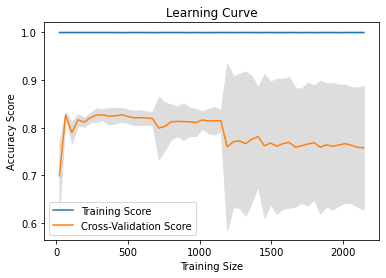

In [516]:
plt.plot(train_sizes, train_mean, label= 'Training Score')
plt.plot(train_sizes, test_mean, label= 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [559]:
import imblearn

In [560]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Is_Submitted': 1})
Resample dataset shape Counter({'Is_Submitted': 1})


In [561]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Is_Submitted': 1})


In [562]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                 1669
Model:                            GLM   Df Residuals:                     1657
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -654.14
Date:                Fri, 15 Apr 2022   Deviance:                       1308.3
Time:                        12:32:17   Pearson chi2:                 1.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6979      0.363    -10.174      0.000      -4.410      -2.985
x1             0.5631      0.304      1.850      0.064      -0.034       1.160
x2            65.2580   3.58e+04      0.002      0.999   -7.02e+04    7.03e+04
x3             1.3952      0.171      8.179      0.000       1.061       1.730
x4             0.5731      0.226      2.537      0.011       0.130       1.016
x5            -2.2615      0.987     -2.291      0.022      -4.196      -0.327
x6             0.0322      0.244      0.132      0.895      -0.447       0.511
x7           -11.9251     23.976     -0.497      0.619     -58.917      35.067
x8             0.8817      0.147      5.990      0.000       0.593       1.170
x9             0.9232      0.282      3.276      0.001       0.371       1.475
x10            0.3178      0.159      2.003      0.045       0.007       0.629
x11           -1.3091      0.492     -2.661      0.008      -2.273      -0.345
==============================================================================
"""

In [543]:
X_train.shape, y_train.shape

((1669, 11), (1669, 1))

In [544]:
X_test.shape, y_test.shape

((716, 11), (716, 1))

In [563]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.010320
Feature 1: 0.000888
Feature 2: 0.021850
Feature 3: 0.002136
Feature 4: 0.009886
Feature 5: 0.002251
Feature 6: 0.000000
Feature 7: 0.018865
Feature 8: 0.006137
Feature 9: 0.000000
Feature 10: 0.000000


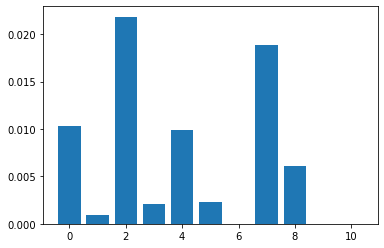

In [564]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [547]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [548]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 8)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [549]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True])

In [550]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [551]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('2_Digit_NAICS_Code', True, 1),
 ('Status', True, 1),
 ('Check_LLC_in_Name', True, 1),
 ('LS_Self_Graded_Credit', True, 1),
 ('LS_Months_in_Business', True, 1),
 ('LS_State', False, 4),
 ('LS_GAS', False, 3),
 ('Premium_Marketing_Leads', True, 1),
 ('LS_Entity_Type', True, 1),
 ('Email_Domain', False, 2),
 ('LS_Amount_to_Borrow', True, 1)]

In [553]:
col = X_train.columns[rfe.support_]
col

Index(['2_Digit_NAICS_Code', 'Status', 'Check_LLC_in_Name',
       'LS_Self_Graded_Credit', 'LS_Months_in_Business',
       'Premium_Marketing_Leads', 'LS_Entity_Type', 'LS_Amount_to_Borrow'],
      dtype='object')

In [554]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                 1669
Model:                            GLM   Df Residuals:                     1660
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -656.56
Date:                Fri, 15 Apr 2022   Deviance:                       1313.1
Time:                        11:09:45   Pearson chi2:                 1.74e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6230      0.342    -10.609      0.000      -4.292      -2.954
x1             0.6129      0.303      2.025      0.043       0.020       1.206
x2            65.3678   3.53e+04      0.002      0.999   -6.91e+04    6.93e+04
x3             1.4123      0.170      8.292      0.000       1.078       1.746
x4             0.5493      0.225      2.437      0.015       0.108       0.991
x5            -2.1295      0.970     -2.196      0.028      -4.030      -0.229
x6             0.8855      0.143      6.206      0.000       0.606       1.165
x7             0.9467      0.282      3.363      0.001       0.395       1.499
x8            -1.3160      0.482     -2.729      0.006      -2.261      -0.371
==============================================================================
"""

In [415]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.20632314, 0.15100334, 0.01864169, 0.17445207, 0.02200639,
       0.05018656, 0.13714383, 0.11366384, 0.10931263, 0.09266958])

In [416]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.20632314, 0.15100334, 0.01864169, 0.17445207, 0.02200639,
       0.05018656, 0.13714383, 0.11366384, 0.10931263, 0.09266958])

In [417]:
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.206323,0,1999
0.151003,0,1806
0.018642,0,636
0.174452,0,65
0.022006,0,866
...,...,...
0.023845,0,1050
0.165607,0,1752
0.117872,0,770
0.022765,0,842


In [418]:
y_train_pred_final.reset_index(inplace=True)

In [419]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [420]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Submitted_Prob.map(lambda x: 1 if x > 0.15 else 0)
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.206323,0,1999,1,1,1,1,1,1,1,1,1,1
1,0.151003,0,1806,1,1,1,1,1,1,1,1,1,1
2,0.018642,0,636,0,0,0,0,0,0,0,0,0,0
3,0.174452,0,65,1,1,1,1,1,1,1,1,1,1
4,0.022006,0,866,0,0,0,0,0,0,0,0,0,0


In [421]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.15 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0.206323,0,1999,1,1,1,1,1,1,1,1,1,1,1
1,0.151003,0,1806,1,1,1,1,1,1,1,1,1,1,1
2,0.018642,0,636,0,0,0,0,0,0,0,0,0,0,0
3,0.174452,0,65,1,1,1,1,1,1,1,1,1,1,1
4,0.022006,0,866,0,0,0,0,0,0,0,0,0,0,0


In [422]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Submitted, y_train_pred_final.predicted )
print(confusion)

[[841 552]
 [ 67 209]]


In [423]:
print(metrics.accuracy_score(y_train_pred_final.Submitted, y_train_pred_final.predicted))

0.6291192330736968


In [424]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [425]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,2_Digit_NAICS_Code,3.57
3,LS_Self_Graded_Credit,3.24
6,LS_Entity_Type,2.30
2,Check_LLC_in_Name,1.89
5,Premium_Marketing_Leads,1.73
7,LS_Amount_to_Borrow,1.71
4,LS_Months_in_Business,1.44
1,Status,1.01


In [426]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [427]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7572463768115942

In [428]:
TN / float(TN+FP)

0.6037329504666188

In [429]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3962670495333812


In [430]:
# positive predictive value 
print (TP / float(TP+FP))

0.27463863337713534


In [431]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9262114537444934


In [432]:
from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [433]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Submitted, y_train_pred_final.Submitted_Prob, drop_intermediate = False )

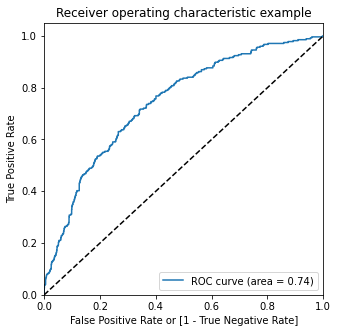

In [434]:
draw_roc(y_train_pred_final.Submitted, y_train_pred_final.Submitted_Prob)

In [435]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Submitted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.629119  0.757246  0.603733
0.1   0.1  0.629119  0.757246  0.603733
0.2   0.2  0.629119  0.757246  0.603733
0.3   0.3  0.629119  0.757246  0.603733
0.4   0.4  0.629119  0.757246  0.603733
0.5   0.5  0.629119  0.757246  0.603733
0.6   0.6  0.629119  0.757246  0.603733
0.7   0.7  0.629119  0.757246  0.603733
0.8   0.8  0.629119  0.757246  0.603733
0.9   0.9  0.629119  0.757246  0.603733


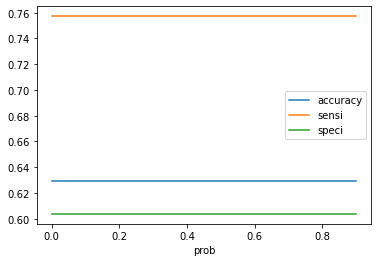

In [436]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

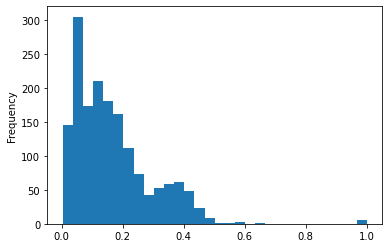

In [437]:
ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=30)

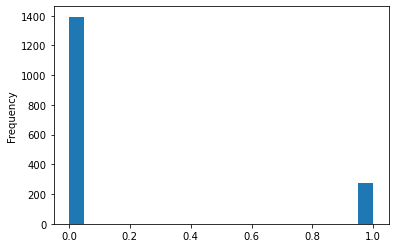

In [438]:
ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

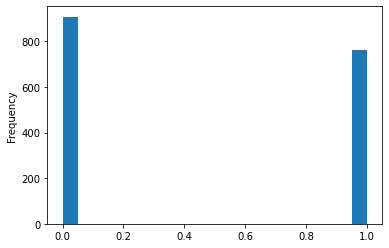

In [439]:
ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [440]:
y_train_pred_final.to_csv('Sub_probmm4-11.csv', index = True)

In [441]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.808


In [442]:
#  Logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [443]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.52392947 0.5        0.49244332 0.50063052 0.55107188]
Mean Accuracy Score for Log Reg: 0.5136150383868928



In [444]:
accuracy_score(y_test,y_pred, normalize=True) * 100

82.40223463687151

In [445]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.8364289994008388


In [446]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [447]:
scores

{'fit_time': array([0.01900244, 0.00999999, 0.01800323, 0.01100707, 0.01300073]),
 'score_time': array([0.00800204, 0.008003  , 0.00699878, 0.00799417, 0.00600243]),
 'test_acc': array([0.52392947, 0.5       , 0.49244332, 0.50063052, 0.55107188]),
 'test_prec': array([0.52087912, 0.        , 0.490625  , 0.        , 0.5601173 ]),
 'test_rec': array([0.59697733, 0.        , 0.39546599, 0.        , 0.48110831]),
 'test_f1': array([0.55633803, 0.        , 0.43793584, 0.        , 0.51761518])}

In [448]:
KNN_model = KNeighborsClassifier()

In [449]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.71662469 0.72040302 0.64609572 0.70617907 0.71626734]
Mean Accuracy Score for KNN: 0.7011139663491317


In [450]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.7373961711575785


In [451]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'splitter': 'best'}

In [452]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4)

In [453]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 63.608870967741936
Out-of-sample Accuracy: 64.31451612903226


In [454]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[197 312]
 [ 42 441]]
              precision    recall  f1-score   support

           0       0.82      0.39      0.53       509
           1       0.59      0.91      0.71       483

    accuracy                           0.64       992
   macro avg       0.70      0.65      0.62       992
weighted avg       0.71      0.64      0.62       992



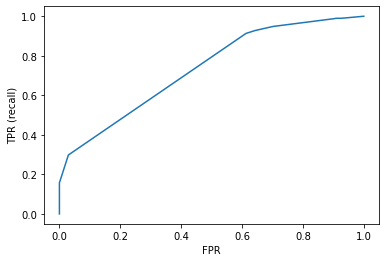

In [455]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [463]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [464]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.734


In [466]:
#from sklearn.model_selection import cross_val_score
#cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
#print(cv_scores)

In [467]:
feature_names = X = LeadScore_df.drop('Is_Submitted', axis =1)

In [468]:
#print(feature_names)
model.feature_importances_

array([0.4218313 , 0.01240389, 0.        , 0.        , 0.0339753 ,
       0.01013119, 0.02822724, 0.00657058, 0.48686049, 0.        ,
       0.        ])

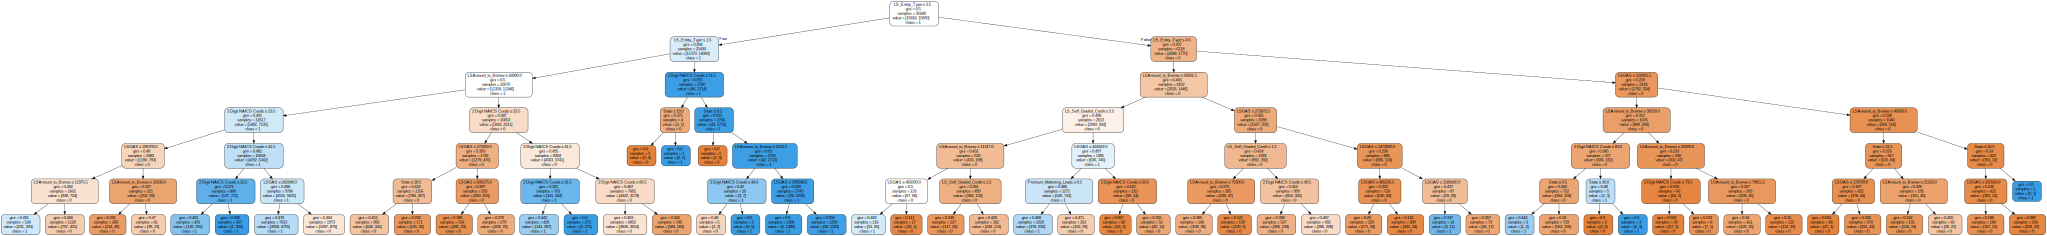

<Figure size 1440x1080 with 0 Axes>

In [120]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['0', '1']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)
graph

In [108]:
#graph.render("decision_treeLeadN_graphviz")
#'decision_treeLeadN_graphviz.png'

In [469]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
LS_Entity_Type,0.486860
2_Digit_NAICS_Code,0.421831
LS_Months_in_Business,0.033975
LS_GAS,0.028227
Status,0.012404


In [470]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 100.0
Out-of-sample Accuracy: 86.59274193548387


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [148]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [149]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5817929358673957


In [ ]:
#len(CreditRisk_merge['contract_number'].unique())